<a href="https://colab.research.google.com/github/kjghfnxggdgbvg/kjghfnxggdgbvg/blob/main/dectree2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/Fraud_check.csv")

In [ ]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
df.shape

(600, 6)

In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [ ]:
df['tax'] = pd.cut(df['Taxable.Income'], bins=[10002,30000,99620],labels = ['Risky','good'])

In [ ]:
print(df)

     Taxable.Income  City.Population  Work.Experience  Undergrad_NO  \
0             68833            50047               10             1   
1             33700           134075               18             0   
2             36925           160205               30             1   
3             50190           193264               15             0   
4             81002            27533               28             1   
..              ...              ...              ...           ...   
595           76340            39492                7             0   
596           69967            55369                2             0   
597           47334           154058                0             1   
598           98592           180083               17             0   
599           96519           158137               16             1   

     Undergrad_YES  Marital.Status_Divorced  Marital.Status_Married  \
0                0                        0                       0   
1    

In [ ]:
df = pd.get_dummies(df,columns = ['tax'],drop_first=True)

In [ ]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,tax_good
0,68833,50047,10,1,0,0,0,1,0,1,1
1,33700,134075,18,0,1,1,0,0,0,1,1
2,36925,160205,30,1,0,0,1,0,0,1,1
3,50190,193264,15,0,1,0,0,1,0,1,1
4,81002,27533,28,1,0,0,1,0,1,0,1


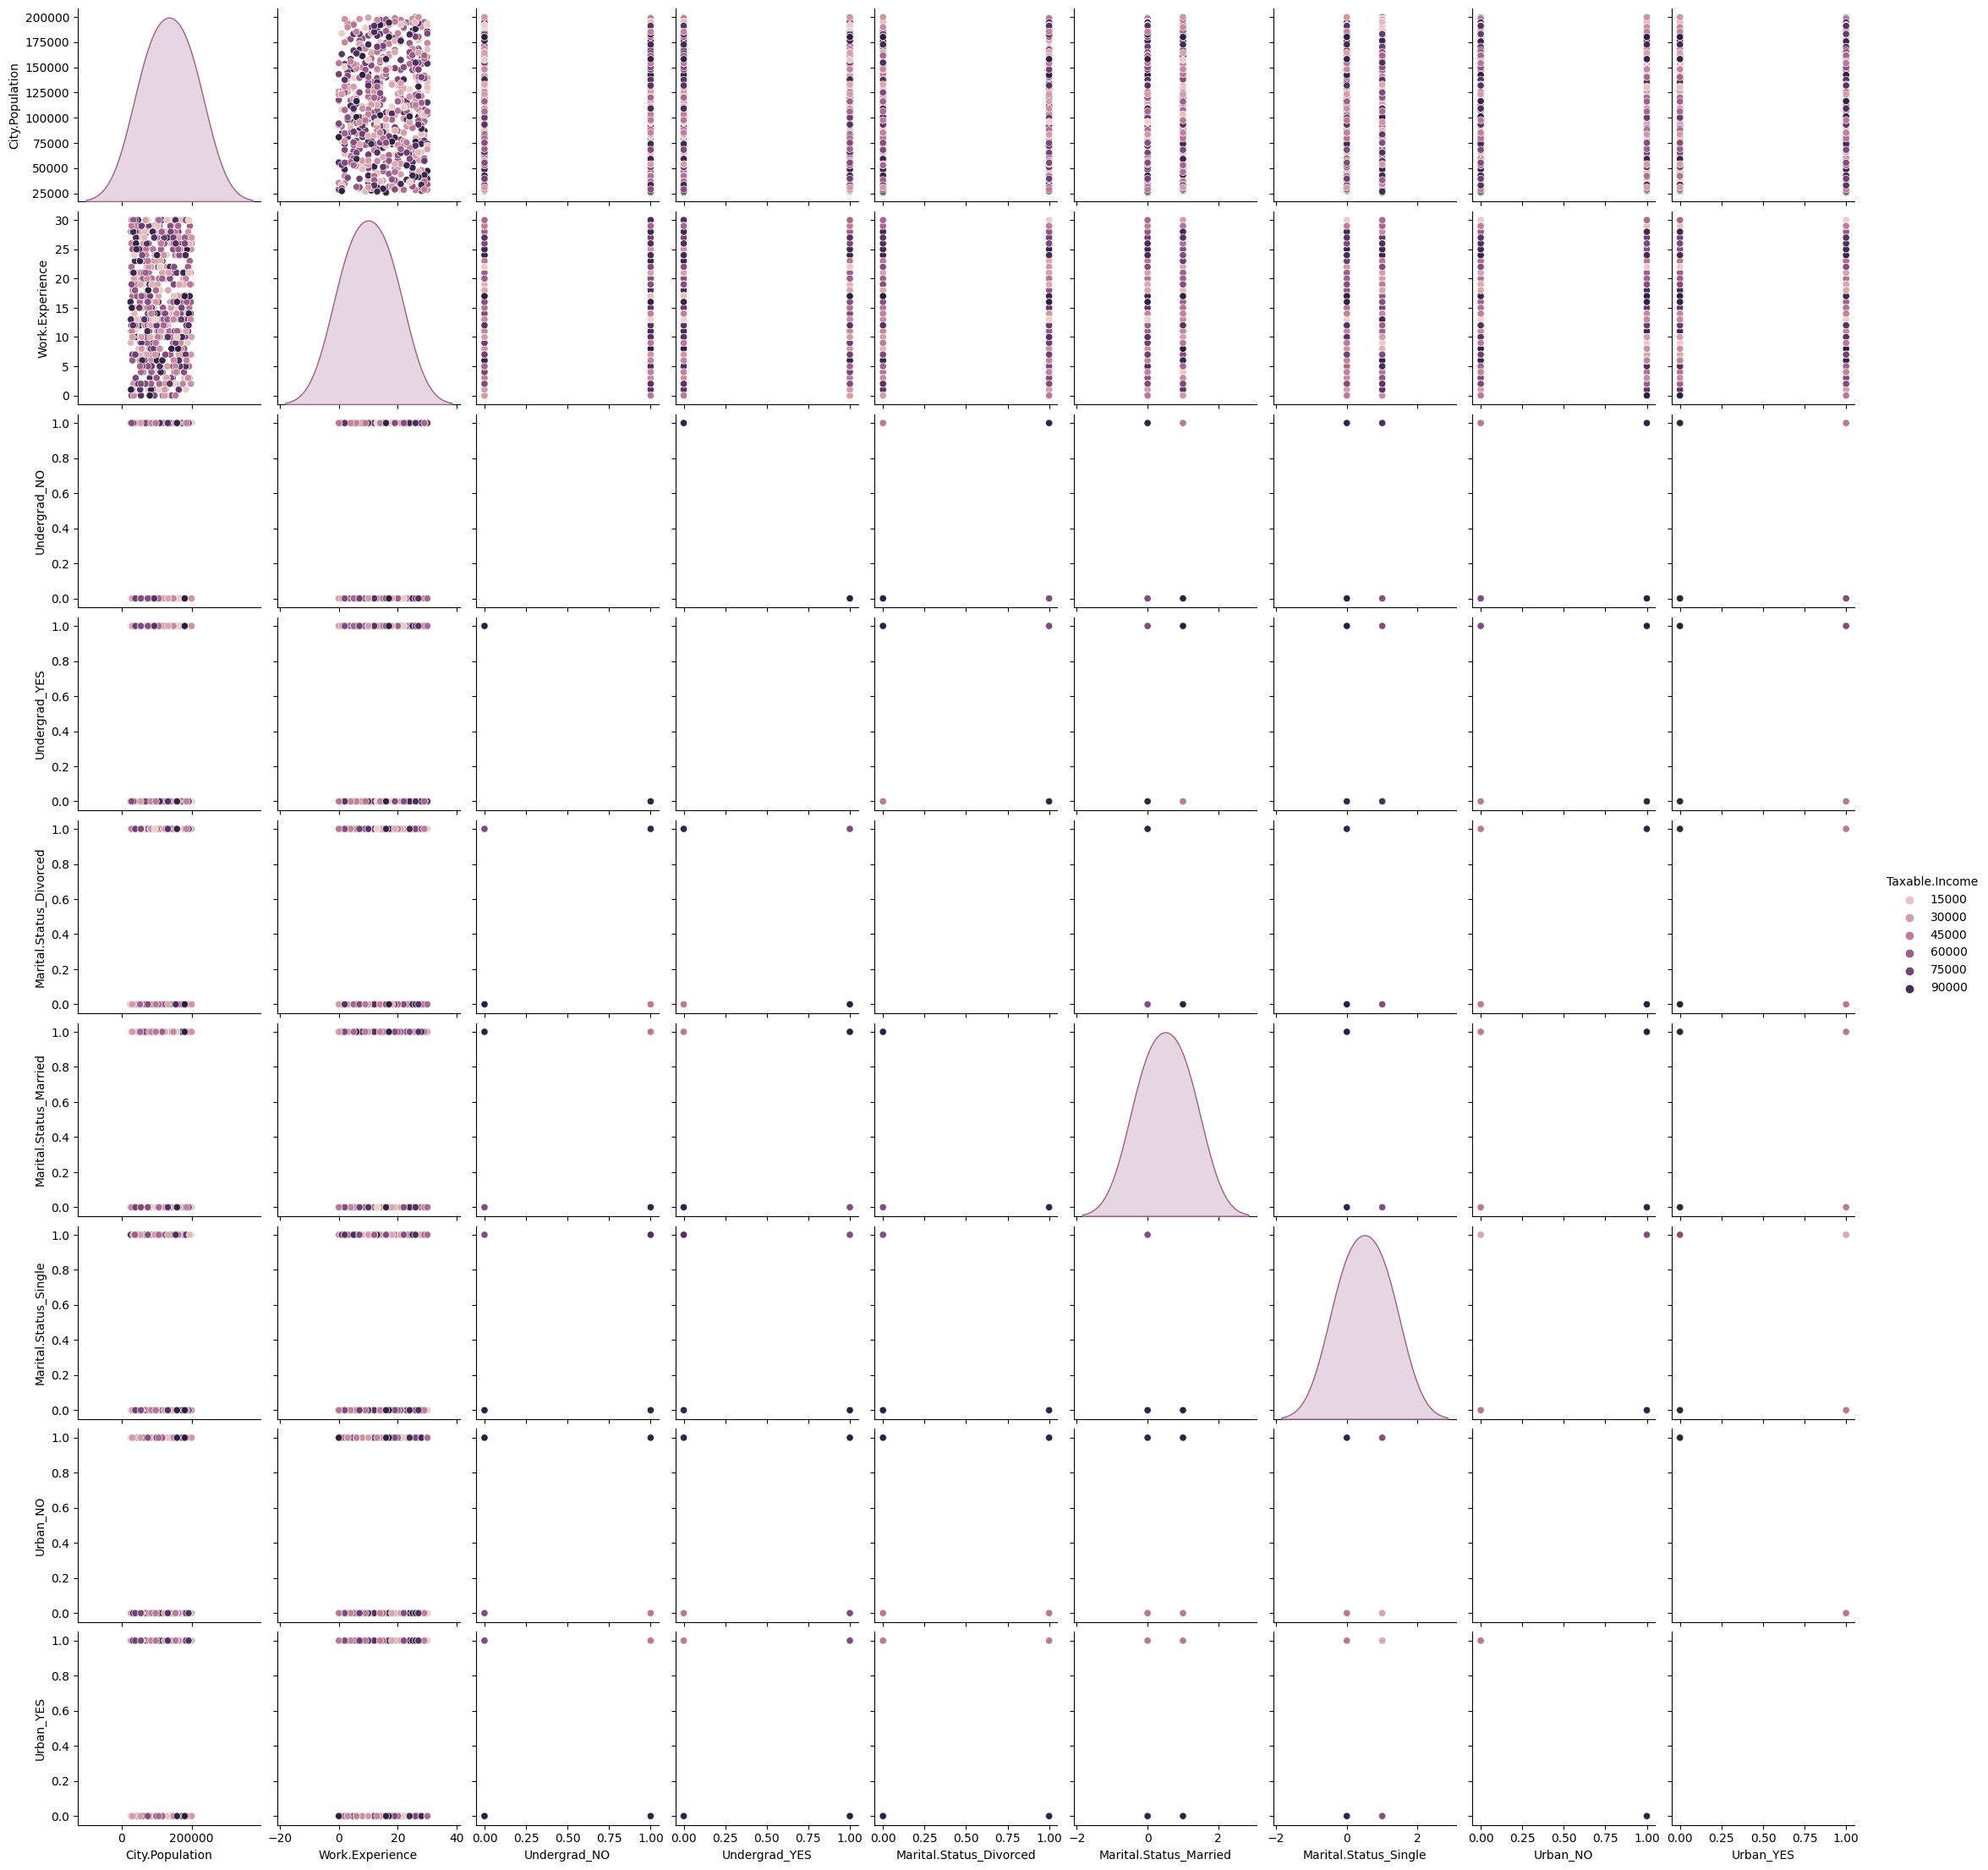

In [ ]:
import seaborn as sns
sns.pairplot(data=df , hue='Taxable.Income')

In [ ]:
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return(x)

In [ ]:
scale_df = norm_func(df.iloc[:,1:])
scale_df

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,tax_good
0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
595,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
X = scale_df.drop(['tax_good'],axis=1)
y = scale_df['tax_good']

In [ ]:
# SPLITTING THE DATA

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)

In [ ]:
scale_df['income']='<=30000'
scale_df.loc[df['Taxable.Income']>=30000,'income']='good'
scale_df.loc[df['Taxable.Income']<=30000,'income']='risky'


In [ ]:
df.drop(['Taxable.Income'],axis=1,inplace=True)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df.columns:
  if df[column_name].dtype == object:
    df[column_name] = le.fit_transform(df[column_name])
  else:
    pass

In [ ]:
# BUILD THE MODEL

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
model = DecisionTreeClassifier(max_depth=3 , criterion='entropy')

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
train_predicted = model.predict(X_train)

In [ ]:
confusion_matrix(y_train , train_predicted)

array([[  7,  91],
       [  2, 380]])

In [ ]:
print(classification_report(y_train , train_predicted))

              precision    recall  f1-score   support

         0.0       0.78      0.07      0.13        98
         1.0       0.81      0.99      0.89       382

    accuracy                           0.81       480
   macro avg       0.79      0.53      0.51       480
weighted avg       0.80      0.81      0.74       480



In [ ]:
test_predicted = model.predict(X_test)

In [ ]:
confusion_matrix(y_test,test_predicted)

array([[ 0, 26],
       [ 1, 93]])

In [ ]:
print(classification_report(y_test , test_predicted))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        26
         1.0       0.78      0.99      0.87        94

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.61      0.78      0.68       120



In [ ]:
from sklearn import tree

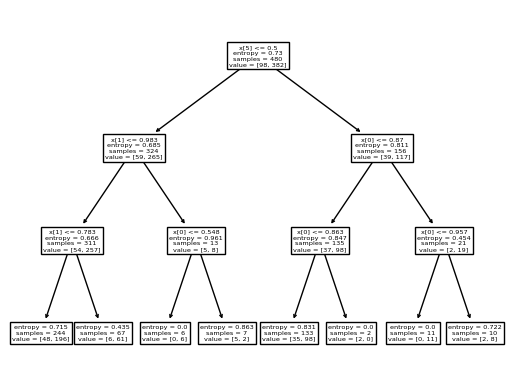

In [ ]:
tree.plot_tree(model);

In [ ]:
df.columns

Index(['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES', 'tax_good'],
      dtype='object')

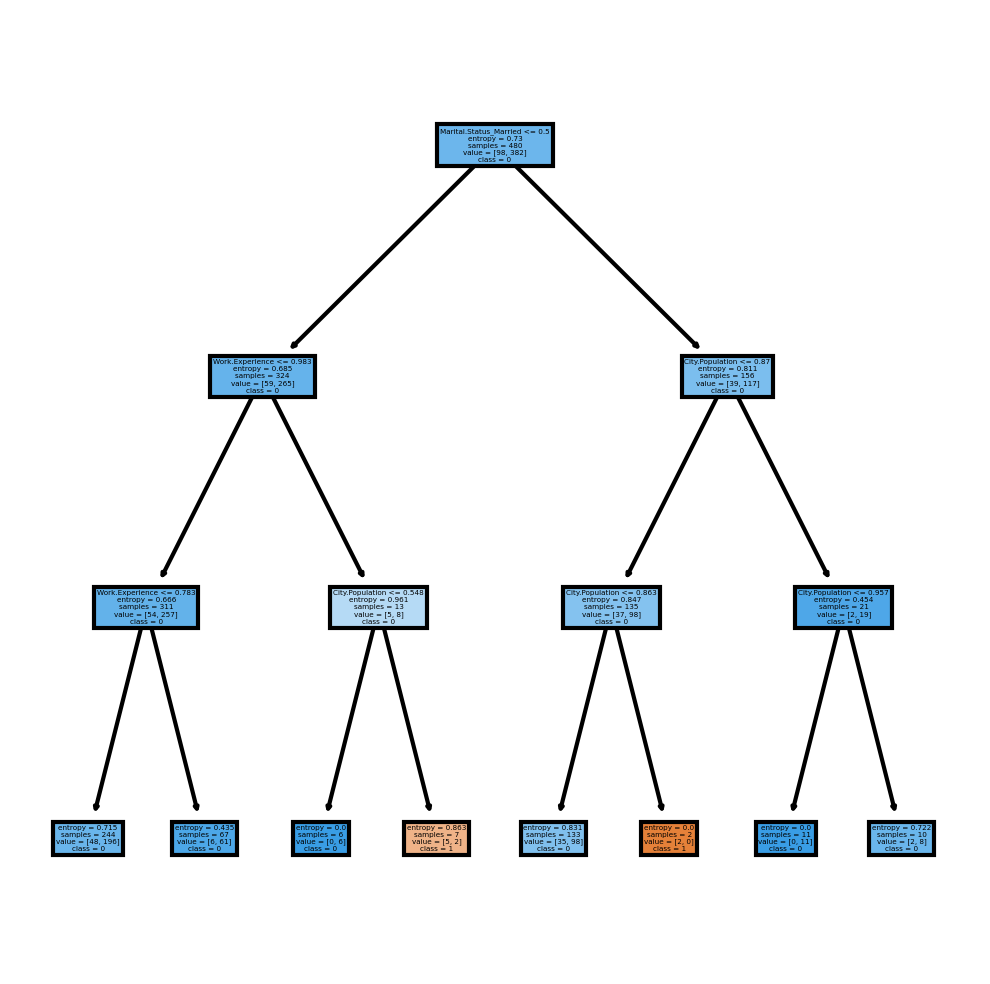

In [ ]:
ft = ['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES']
ct = ['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize =(4,4), dpi=300)
tree.plot_tree(model,
               feature_names= ft,
               class_names=ct,
               filled = True);

gini method

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini' , max_depth=3)

In [ ]:
model_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
test_predict = model.predict(X_test)

In [ ]:
np.mean(test_predict==y_test)

0.775

In [ ]:
features = X.columns.values

In [ ]:
features

array(['City.Population', 'Work.Experience', 'Undergrad_NO',
       'Undergrad_YES', 'Marital.Status_Divorced',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_NO',
       'Urban_YES'], dtype=object)

In [ ]:
classes = ['1','0']
classes

['1', '0']

In [ ]:
from sklearn import tree


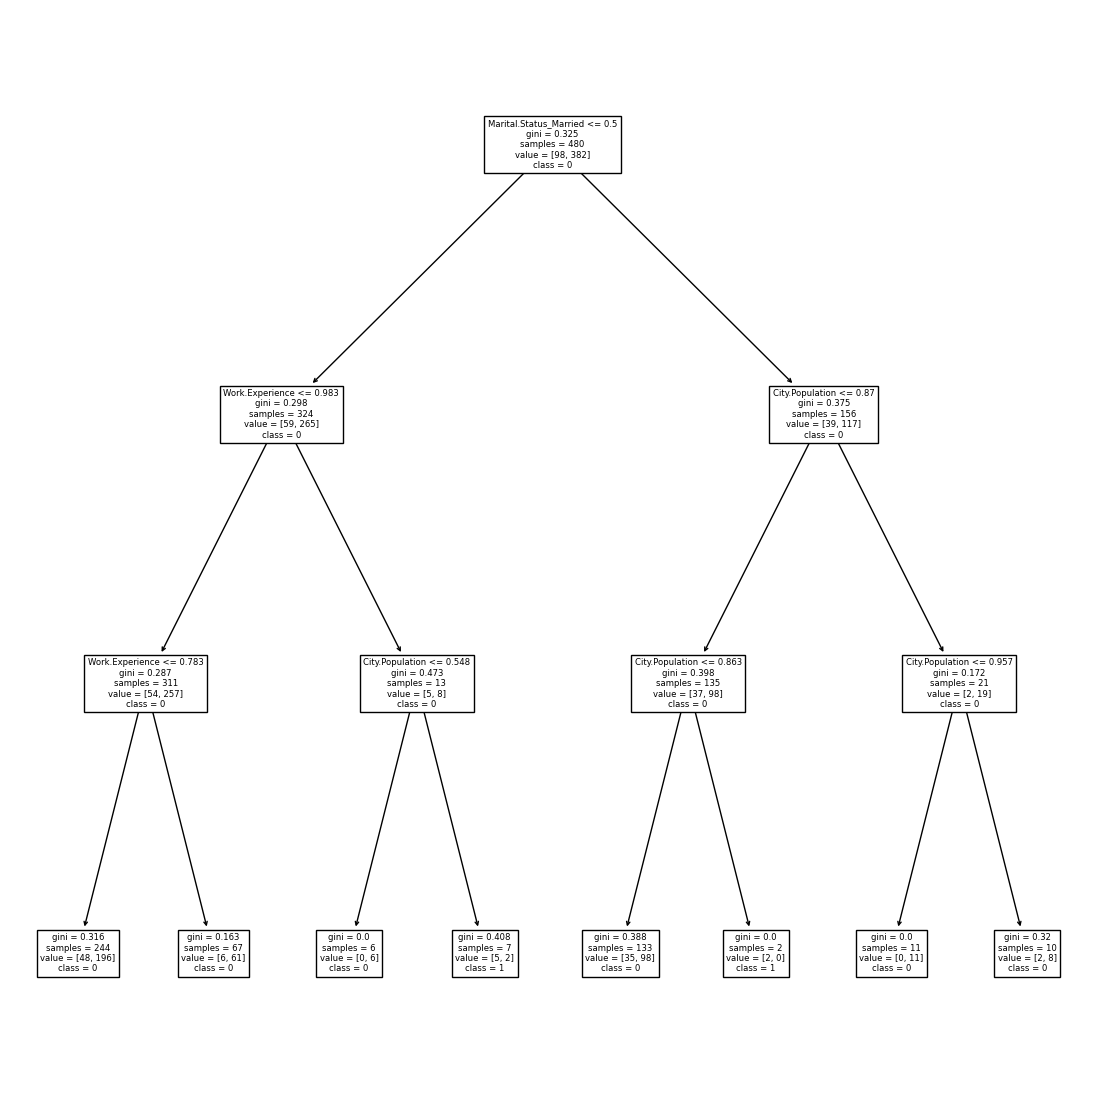

In [ ]:
fig, axes = plt.subplots(figsize = (14,14))
tree.plot_tree(model_gini, feature_names=features, class_names=classes)
plt.show()

decision tree with regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
df

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,tax_good
0,50047,10,1,0,0,0,1,0,1,1
1,134075,18,0,1,1,0,0,0,1,1
2,160205,30,1,0,0,1,0,0,1,1
3,193264,15,0,1,0,0,1,0,1,1
4,27533,28,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,1
596,55369,2,0,1,1,0,0,0,1,1
597,154058,0,1,0,1,0,0,0,1,1
598,180083,17,0,1,0,1,0,1,0,1


In [ ]:
df.shape

(600, 10)

In [ ]:
data = df.values

In [ ]:
X = data[:,0:3]
y = data[:,3]

In [ ]:
y

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
model.score(X_test,y_test)

1.0